### Assignment 3

In [4]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
import gensim.downloader as api
from sklearn.decomposition import TruncatedSVD
import random

## Part 1 & 2

I ran the model one by one since it too much time to run them all together (even in a large vm).

In [4]:
def load(model_name):
    '''
    Downloading and loading model into memory, as a dictionary of arrays, the keys are the words.
    '''
    wv_from_bin = api.load(model_name)
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin


In [25]:
models_names = ["fasttext-wiki-news-subwords-300"]
#glove-wiki-gigaword-300, "glove-wiki-gigaword-50", "word2vec-google-news-300", "glove-twitter-200", "fasttext-wiki-news-subwords-300"]
categories = ["capital-wolrd", "currency", "city-in-state", "family", "gram1-adjective-to-adverb", "gram2-opposite", "gram3-comparative", "gram6-nationality-adjective", "overall"]



In [26]:
results = {}
with open("questions-words.txt") as f:
        lines = f.readlines()
for model_name in models_names:
    catagory = ""
    correct_answer = 0 
    counter = 0
    overall_counter = 0
    overall_correct_answer = 0
    print(model_name)
    model = load(model_name)
    model_results = {}
    for line in lines:
        if ":" in line:
            if (catagory != ""):
                model_results[catagory] = correct_answer/counter
            catagory = line.split()[-1]
            counter = 0
            correct_answer = 0
            continue
        words = line.split()
        overall_counter = overall_counter + 1
        counter = counter + 1
        if words[0] not in model.vocab or words[1] not in model.vocab or words[2] not in model.vocab:
            words = line.lower().split()
            if words[0] not in model.vocab or words[1] not in model.vocab or words[2] not in model.vocab:
                continue
        result = model.most_similar(positive=[words[1], words[2]], negative=[words[0]], topn=1)
        if (result[0][0] == words[3]):
            correct_answer = correct_answer + 1
            overall_correct_answer = overall_correct_answer + 1
    model_results['overall'] = overall_correct_answer/overall_counter
    results[model_name] = model_results
        
        
        
            
        

fasttext-wiki-news-subwords-300
Loaded vocab size 999999


In [27]:
print(results)

{'fasttext-wiki-news-subwords-300': {'city-in-state': 0.8054316984191325, 'gram8-plural': 0.9451951951951952, 'gram7-past-tense': 0.8378205128205128, 'gram5-present-participle': 0.9772727272727273, 'currency': 0.37644341801385683, 'gram4-superlative': 0.9919786096256684, 'capital-common-countries': 0.9841897233201581, 'family': 0.849802371541502, 'overall': 0.8726975030699959, 'gram6-nationality-adjective': 0.9274546591619762, 'gram2-opposite': 0.6071428571428571, 'gram3-comparative': 0.9692192192192193, 'capital-world': 0.9544650751547303, 'gram1-adjective-to-adverb': 0.6965725806451613}}


## results

| Model/analogy-set               	| capital-wolrd 	| currency 	| city-in-state 	| family 	| gram1-adjective-to-adverb 	| gram2-opposite 	| gram3-comparative 	| gram6-nationality-adjective 	| Overall 	|
|---------------------------------	|---------------	|----------	|---------------	|--------	|---------------------------	|----------------	|-------------------	|-----------------------------	|---------	|
| glove-wiki-gigaword-300         	| 0.9597        	| 0.158    	| 0.593         	| 0.881  	| 0.225                     	| 0.2733         	| 0.881             	| 0.9255                      	| 0.717   	|
| glove-wiki-gigaword-50          	| 0.8598        	| 0.0831   	| 0.153         	| 0.6897 	| 0.684                     	| 0.0948         	| 0.518             	| 0.8599                      	| 0.4621  	|
| word2vec-google-news-300        	| 0.7913        	| 0.3510   	| 0.70895       	| 0.8458 	| 0.2852                    	| 0.4273         	| 0.9084            	| 0.8993                      	| 0.735   	|
| glove-twitter-200               	| 0.609         	| 0.0196   	| 0.3563        	| 0.6778 	| 0.1169                    	| 0.2364         	| 0.742             	| 0.5884                      	| 0.5255  	|
| fasttext-wiki-news-subwords-300 	| 0.9544        	| 0.3764   	| 0.8054        	| 0.8498 	| 0.696                     	| 0.6071         	| 0.9692            	| 0.9274                      	| 0.8726  	|

# part 3:



In [5]:
model = load("glove-wiki-gigaword-50")

Loaded vocab size 400000


In [39]:
def reduce_dim(model, number_of_vectors=10000, required_words=["car"]):
    required_words_indexes = []
    for word in required_words:
        index = None
        if word in model.vocab:
            index = model.vocab[word].index
        elif word.lower() in model.vocab:
            index = model.vocab[word].index
        if (index!=None):
            required_words_indexes.append(index)
    requried_matrix = model.vectors[np.array(required_words_indexes)]
    random_indexes = []
    while len(random_indexes)<number_of_vectors:
        x = random.sample(range(model.vectors.shape[0]),1)
        if x not in required_words_indexes:
            random_indexes.append(x)
    rand_matrix = model.vectors[np.array(random_indexes)].reshape(number_of_vectors, requried_matrix.shape[1])
    matrix = np.array(list(requried_matrix) + list(rand_matrix))
    svd = TruncatedSVD(n_components=2, algorithm='randomized', n_iter=5, random_state=12,  tol=0.0)
    v = svd.fit_transform(matrix)
    return v
    


In [40]:
reduced_dim_matrix = reduce_dim(model)

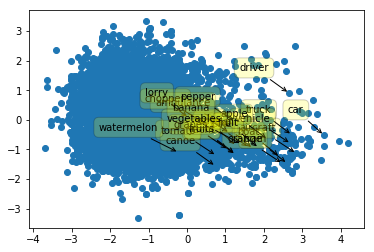

In [41]:
def show_embeddings(data, labels):
    plt.scatter(data[:, 0], data[:, 1], marker='o')

    for label, x, y in zip(labels, data[:, 0], data[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

required_words_list = ['aircraft',
'ambulance',
'bicycle',
'bike',
'boat',
'car',
'truck',
'chopper',
'canoe',
'driver',
'lorry',
'suv',
'train',
'vehicle',
'yacht',
'apple',
'banana',
'orange',
'tomato',
'pepper',
'watermelon',
'grapes',
'fruit',
'fruits',
'vegetables']

reduced_dim_matrix = reduce_dim(model, required_words=required_words_list)
reduced_dim_matrix_only_required_words = reduced_dim_matrix[:len(required_words_list)]

# Testing        
show_embeddings(reduced_dim_matrix, required_words_list)

Now we will show in a graph only the requiered words 

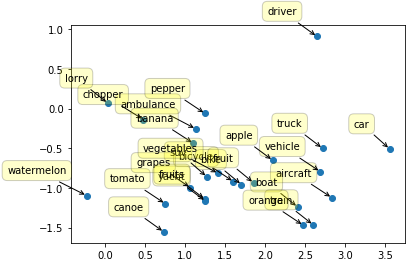

In [42]:
show_embeddings(reduced_dim_matrix_only_required_words, required_words_list)

# part 4: Named entity vectors

In [22]:
import nltk
from nltk.corpus import brown
nltk.download('brown')
from nltk import ngrams



[nltk_data] Downloading package brown to /home/dor/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [78]:
def get_surrounding_words(corpus, word1, word2):
    results = []
    for sent in corpus.sents():
        sixgrams = ngrams(sent, 6)
        for grams in sixgrams:
            if (grams[2].lower() == word1 and grams[3].lower() == word2):
                results.extend([grams[0], grams[1], grams[4], grams[5]])
    return results

def get_avg_vector(corpus, word1, word2):
    brown_corpus = Word2Vec(brown.sents())
    surrounding_words = get_surrounding_words(corpus, word1, word2)
    avg_vector = np.zeros(100)
    for word in surrounding_words:
        try:
            vector = brown_corpus[word]
            avg_vector = np.add(avg_vector, vector)
        except KeyError:
            try:
                vector = brown_corpus[word.lower()]
                avg_vector = np.add(avg_vector, vector)
            except KeyError:
                pass
            
        number_of_surrounding_words = len(surrounding_words)
    avg_vector = np.divide(avg_vector, number_of_surrounding_words)
    return avg_vector
                
        

        

In [80]:
#### this is for new york vector
new_york_vector = get_avg_vector(brown, 'new', 'york')
print('new york')
print(new_york_vector)

new york
[-0.14137167 -0.51006323 -0.07799328 -0.02685391  0.23584169  0.07420401
 -0.5984487  -0.36243384 -0.01467016 -0.25723643 -0.62800086  0.11646211
 -0.35552592  0.00483203 -0.41176627  0.44613675  0.43500373 -0.04459519
 -0.32953488 -0.74042936  0.42185532 -0.33217733  0.23452084 -0.08616198
 -0.51767952 -0.15277132 -0.25310519 -0.22519533  0.25724487  0.21085817
 -0.12208725 -0.65533114 -0.27704438 -0.27255247  0.14244236  0.2396442
 -0.10558676 -0.49274547  0.60525879 -0.1554538   0.24883551  0.23063399
 -0.055542    0.11799811  0.17990056 -0.1709648  -0.27561858  0.28541096
 -0.01827041 -0.24443652  0.09430285 -0.52694967 -0.36320461  0.10742346
  0.23604782 -0.11243921 -0.19737047  0.1488583  -0.23210917  0.25783255
 -0.33595235 -0.00912653 -0.17174433  0.0716461  -0.60861676  0.03468016
  0.02980759 -0.24282501 -0.33262113  0.13328571 -0.16845038  0.39511309
 -0.01562099  0.08752313 -0.12282504  0.01337833  0.08965091 -0.00256682
 -0.23355896 -0.22805878  0.06160617 -0.007

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [82]:
#### this is for united states vector
united_states_vector = get_avg_vector(brown, 'united', 'states')
print('united states')
print(united_states_vector)

united states
[-0.18600983 -0.44902815 -0.09325265 -0.03271809  0.17151883  0.0261623
 -0.69063172 -0.35673334  0.10691197 -0.13042224 -0.68270599 -0.04938065
 -0.47110323 -0.07748208 -0.77851574  0.64978491  0.3649188  -0.12531054
 -0.39078829 -0.81375321  0.56248629 -0.31199759  0.4483948   0.05355283
 -0.70923627 -0.21534235 -0.47271601 -0.06524846  0.26127311  0.21928034
 -0.00616664 -0.8982325  -0.18041387 -0.23129896  0.30651086  0.3634517
 -0.04373305 -0.70701872  0.82245154 -0.02014974  0.28506534  0.38033638
 -0.13926026 -0.09569323 -0.0822469  -0.27164146 -0.34060545  0.29523732
  0.08065518 -0.39719591  0.19198311 -0.51119201 -0.45135952  0.27648696
  0.26479901 -0.04766894 -0.04162503  0.0748655  -0.10731765  0.20000458
 -0.50469699 -0.23885465 -0.19993701  0.07778932 -0.45092303  0.30985261
 -0.29559171 -0.26948111 -0.13008633  0.17283749 -0.3592393   0.43631495
 -0.09876366  0.03281352 -0.06563221  0.07570123  0.04896897  0.12888037
 -0.36007454 -0.48430685  0.12846256  0

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
